In [382]:
#importing csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import datetime

In [383]:
def show_elbow(df):
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel=KMeans(n_clusters=k)
        kmeanModel.fit(df)
        distortions.append(kmeanModel.inertia_)
    plt.figure(figsize=(16,8))
    plt.plot(K,distortions,'bx-')
    plt.xlabel('k')
    plt.ylabel('Distorion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
    

def convert_to_date(df):
    new_list=[]
    df['time']=pd.to_datetime(df['time'])
    df['time']=df['time'].dt.strftime('%Y-%m-%d %H:%M:%S')
    df['time']=pd.to_datetime(df['time'])
    for values in df['time']:
        converted = pd.to_datetime(values).value
        new_list.append(converted)
    df['Unix Timestamp']=new_list
    return df

In [384]:
df=pd.read_csv('query.csv')
df=df.sort_values(by=['time'])
df= convert_to_date(df)
print(df)

                   time  latitude  longitude  depth  mag magType  nst    gap  \
912 1951-05-28 15:59:23   28.9250    86.6850   15.0  6.0      mw  NaN    NaN   
911 1952-11-19 10:23:32   29.6820    86.5060   15.0  5.8      mw  NaN    NaN   
910 1953-02-23 00:46:10   29.5290    81.3820   10.0  5.8      mw  NaN    NaN   
909 1953-08-29 01:58:29   28.1680    82.3330   15.0  5.8      mw  NaN    NaN   
908 1954-09-04 06:43:49   28.1690    83.8250   15.0  5.9      mw  NaN    NaN   
..                  ...       ...        ...    ...  ...     ...  ...    ...   
4   2021-05-18 23:57:58   28.2785    84.3373   10.0  5.3      mb  NaN   36.0   
3   2021-05-19 02:41:38   28.3088    84.3042   10.0  4.9      mb  NaN   40.0   
2   2021-05-19 16:54:29   28.2544    84.3876   10.0  4.5      mb  NaN  158.0   
1   2021-05-25 20:46:06   28.9684    86.3755   10.0  4.5      mb  NaN   66.0   
0   2021-06-21 10:06:50   29.2822    87.1240   10.0  4.3      mb  NaN  102.0   

      dmin   rms  ...                  

In [385]:
new_df=df[['latitude','longitude','mag','depth','Unix Timestamp']]
new_df

,latitude,longitude,mag,depth,Unix Timestamp
912,28.9250,86.6850,6.0,15.0,-586857637000000000
911,29.6820,86.5060,5.8,15.0,-540135388000000000
910,29.5290,81.3820,5.8,10.0,-531875630000000000
909,28.1680,82.3330,5.8,15.0,-515714491000000000
908,28.1690,83.8250,5.9,15.0,-483642971000000000
...,...,...,...,...,...
4,28.2785,84.3373,5.3,10.0,1621382278000000000
3,28.3088,84.3042,4.9,10.0,1621392098000000000
2,28.2544,84.3876,4.5,10.0,1621443269000000000
1,28.9684,86.3755,4.5,10.0,1621975566000000000


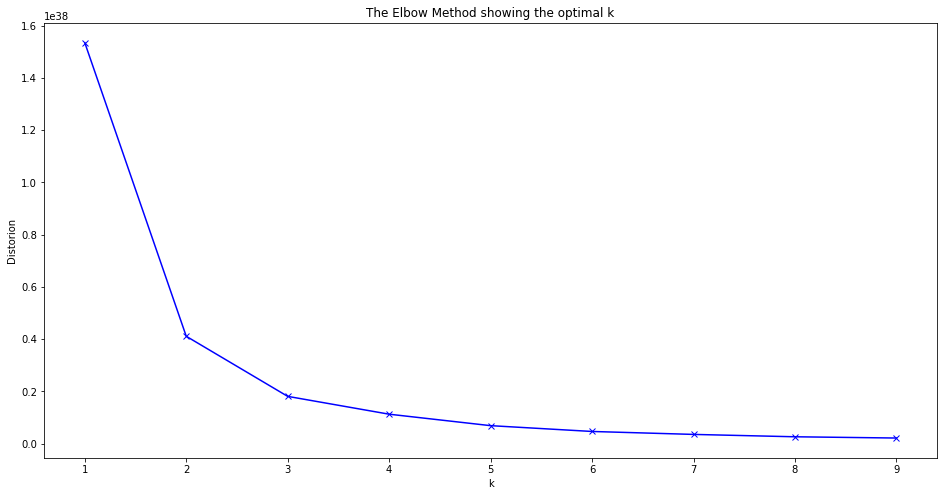

In [387]:
show_elbow(new_df)

In [388]:
kmeanModel = KMeans(n_clusters=3).fit(new_df)
y_pred=kmeanModel.predict(new_df)
print(y_pred)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [389]:
new_df['Cluster']=y_pred
time=df['time']
new_df=new_df.join(time)

C:\Users\Ayush\anaconda3\envs\my_env\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


<AxesSubplot:xlabel='time', ylabel='mag'>

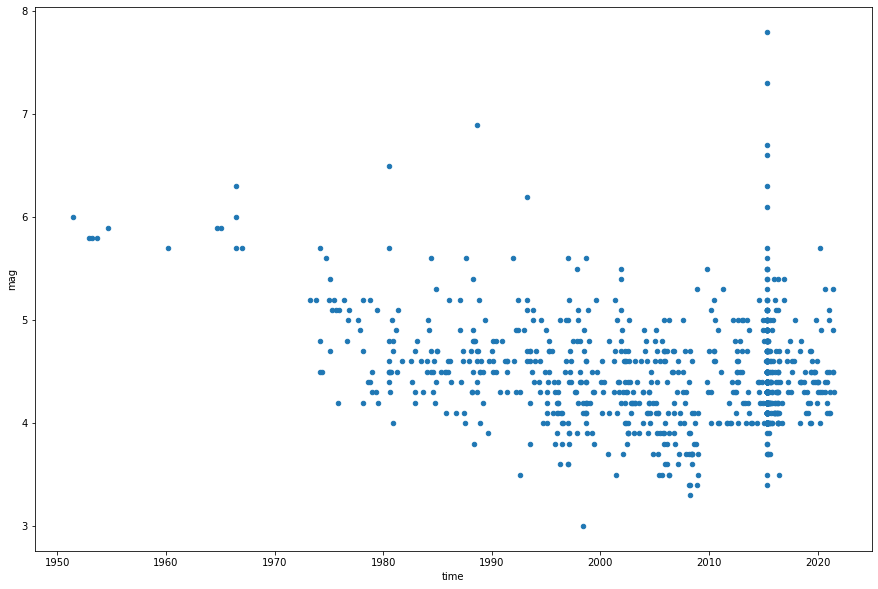

In [390]:
new_df
new_df.plot(x='time',y='mag',kind='scatter', figsize=(15,10))

In [391]:
"""For Cluster 0"""
cluster_0 =  new_df.loc[new_df['Cluster']==0]
"""For Cluster 1"""
cluster_1 = new_df.loc[new_df['Cluster']==1]
"""For Cluster 2"""
cluster_2 = new_df.loc[new_df['Cluster']==2]
"""For Cluster 3"""
cluster_3=new_df.loc[new_df['Cluster']==3]

,latitude,longitude,mag,depth,Unix Timestamp,Cluster,time
515,29.8330,82.0650,4.2,35.0,1192745940000000000,0,2007-10-18 22:19:00
514,27.9450,85.3800,4.7,16.1,1193651361000000000,0,2007-10-29 09:49:21
513,28.2000,84.4530,4.3,2.0,1194283946000000000,0,2007-11-05 17:32:26
512,28.0210,87.0360,3.7,75.8,1194399025000000000,0,2007-11-07 01:30:25
511,28.2320,83.6770,3.7,35.0,1203872854000000000,0,2008-02-24 17:07:34
...,...,...,...,...,...,...,...
4,28.2785,84.3373,5.3,10.0,1621382278000000000,0,2021-05-18 23:57:58
3,28.3088,84.3042,4.9,10.0,1621392098000000000,0,2021-05-19 02:41:38
2,28.2544,84.3876,4.5,10.0,1621443269000000000,0,2021-05-19 16:54:29
1,28.9684,86.3755,4.5,10.0,1621975566000000000,0,2021-05-25 20:46:06


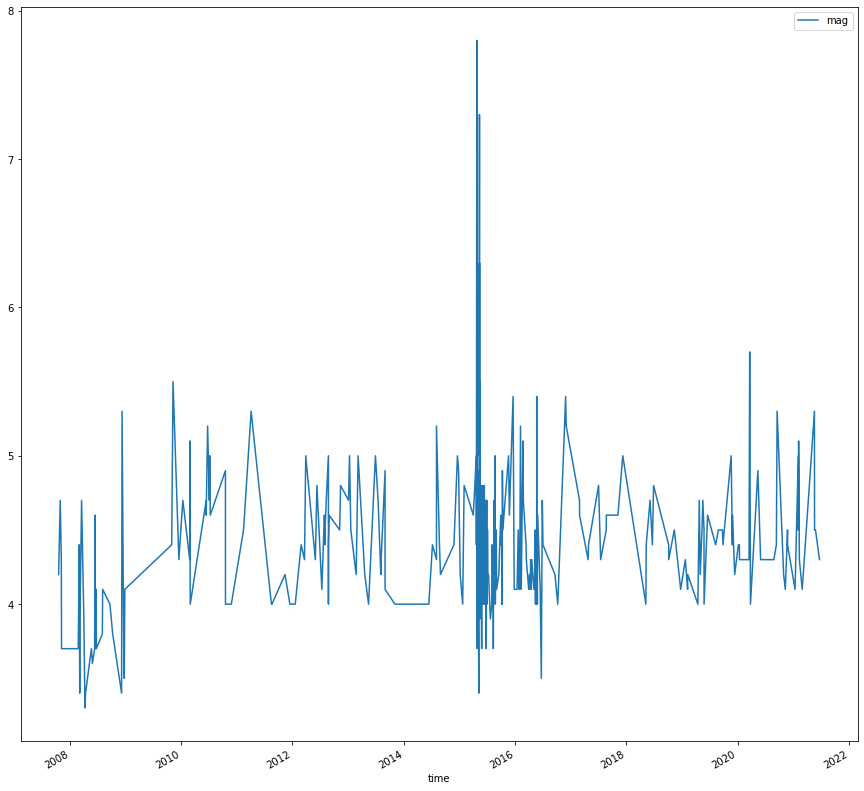

In [392]:
cluster_0.plot(x='time',y='mag',figsize=(15,15),kind='line')
cluster_0

,latitude,longitude,mag,depth,Unix Timestamp,Cluster,time
776,28.762,81.951,4.3,143.2,655920804000000000,1,1990-10-14 16:13:24
775,28.138,82.944,4.8,66.8,661712684000000000,1,1990-12-20 17:04:44
774,28.317,87.683,4.6,42.6,669011296000000000,1,1991-03-15 04:28:16
773,29.340,80.332,4.5,64.9,675235754000000000,1,1991-05-26 05:29:14
772,29.349,80.304,4.6,52.6,675378417000000000,1,1991-05-27 21:06:57
...,...,...,...,...,...,...,...
520,27.291,87.851,4.0,31.7,1179289047000000000,1,2007-05-16 04:17:27
519,29.213,82.196,4.5,10.0,1185981472000000000,1,2007-08-01 15:17:52
518,27.196,86.932,4.3,64.0,1186113052000000000,1,2007-08-03 03:50:52
517,27.344,87.737,5.0,35.0,1186842954000000000,1,2007-08-11 14:35:54


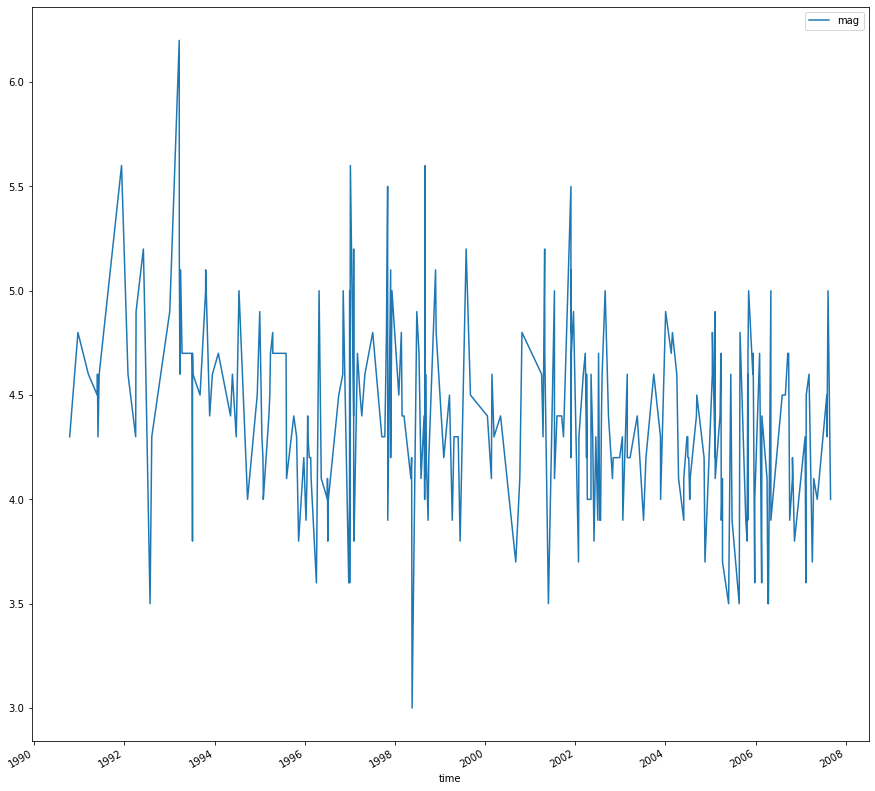

In [393]:
cluster_1.plot(x='time',y='mag',figsize=(15,15),kind='line')
cluster_1

,latitude,longitude,mag,depth,Unix Timestamp,Cluster,time
912,28.925,86.685,6.0,15.0,-586857637000000000,2,1951-05-28 15:59:23
911,29.682,86.506,5.8,15.0,-540135388000000000,2,1952-11-19 10:23:32
910,29.529,81.382,5.8,10.0,-531875630000000000,2,1953-02-23 00:46:10
909,28.168,82.333,5.8,15.0,-515714491000000000,2,1953-08-29 01:58:29
908,28.169,83.825,5.9,15.0,-483642971000000000,2,1954-09-04 06:43:49
...,...,...,...,...,...,...,...
781,28.599,85.714,4.5,52.4,633711986000000000,2,1990-01-30 15:06:26
780,29.925,80.730,4.6,33.0,634578683000000000,2,1990-02-09 15:51:23
779,28.082,82.430,4.8,33.0,635584877000000000,2,1990-02-21 07:21:17
778,28.458,83.343,4.8,33.0,643194602000000000,2,1990-05-20 09:10:02


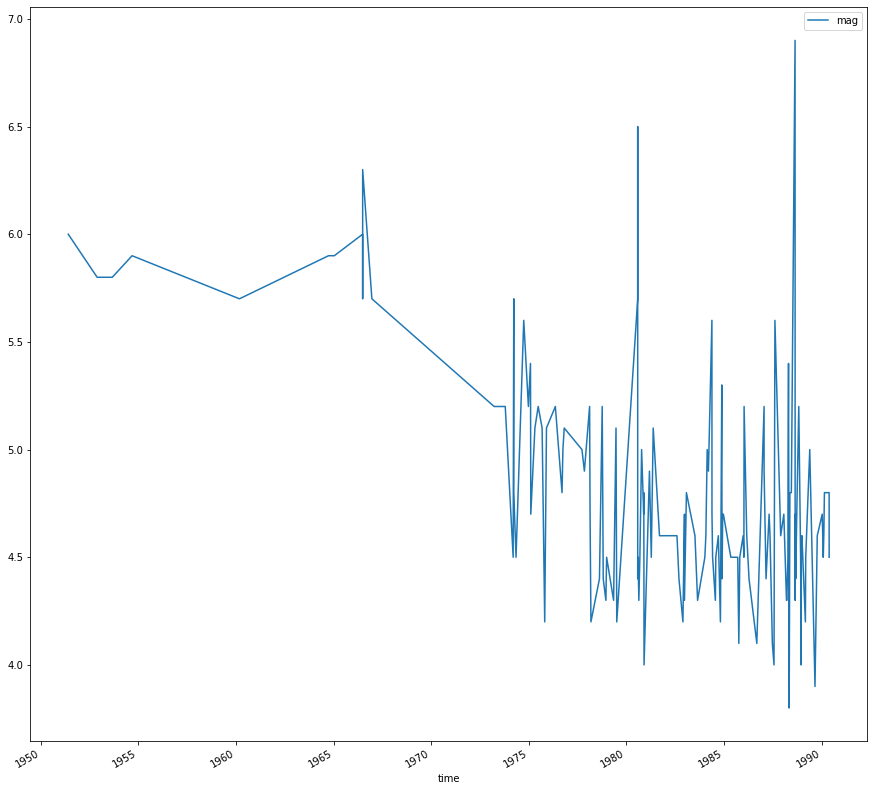

In [394]:
cluster_2.plot(x='time',y='mag',figsize=(15,15),kind='line')
cluster_2

,time,latitude,longitude,mag,depth,Cluster


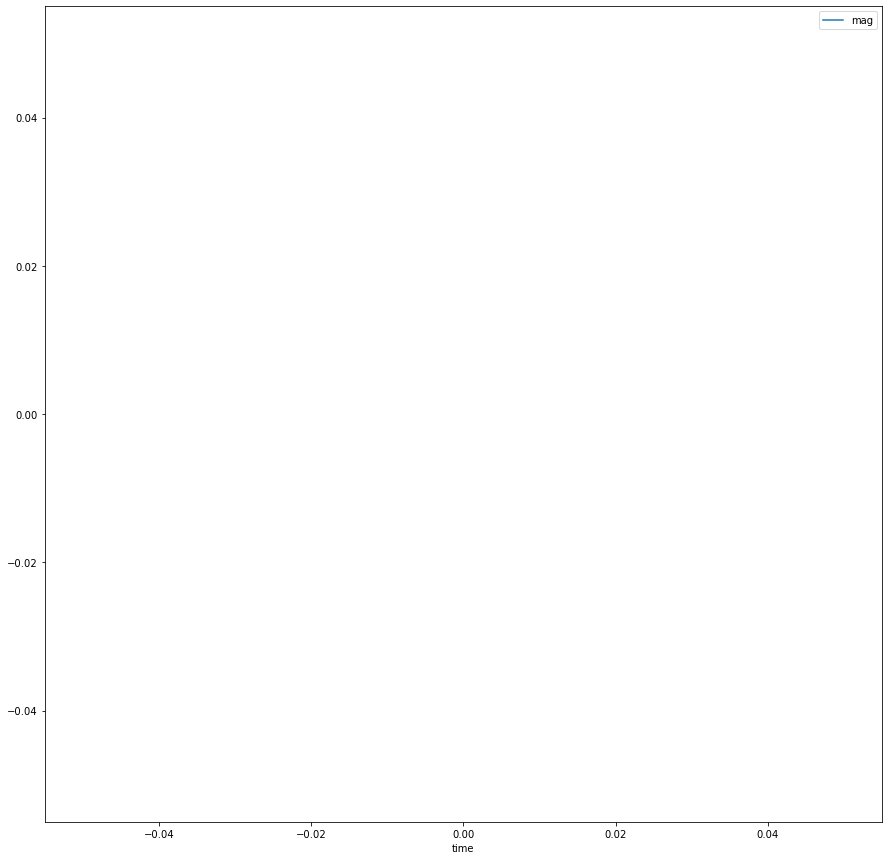

In [343]:
cluster_3.plot(x='time',y='mag',figsize=(15,15),kind='line')
cluster_3
